In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.color import rgb2lab, lab2rgb
from matplotlib import patches as patch
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import inv, det
import scipy as sp
import seaborn as sns
from PIL import Image
from numpy.fft import rfft2, fft2, irfft2, ifft2,fftshift,ifftshift
from tqdm import tqdm
%matplotlib inline



In [3]:
size = 256

def defocus_kernel(d, sz=size):
    kern = np.zeros((sz, sz), np.uint8)
    cv2.circle(kern, (sz, sz), d, 255, -1, cv2.LINE_AA, shift=1)
    kern = np.float32(kern) / 255.0
    return kern


In [48]:

img = Image.open("Picture1.png")
img = img.resize((size,size))
gray_image = img.convert('L')

kernel = defocus_kernel(32, sz=size)


<function matplotlib.pyplot.show(close=None, block=None)>

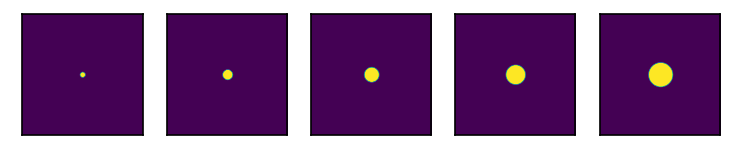

In [5]:
plt.figure(dpi = 150)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(defocus_kernel(10*(i+1), sz=size))
    plt.xticks([])
    plt.yticks([])
plt.show

In [6]:
def Gauss(sigma):
    Gaussian = np.zeros([size,size], float)

    f = lambda x,y: np.exp(-(x*x+y*y)/(2*sigma*sigma))
    for i in range(size//2):
        for j in range(size//2):
            Gaussian[i,j]=f(i,j)
            Gaussian[-i,-j]=f(i,j)
            Gaussian[-i,j]=f(i,j)
            Gaussian[i,-j]=f(i,j)

    return fftshift(Gaussian)

<function matplotlib.pyplot.show(close=None, block=None)>

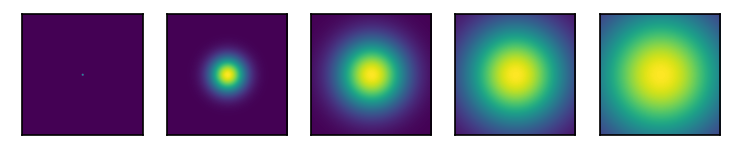

In [7]:
plt.figure(dpi = 150)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(Gauss(sigma = 25*i+1))
    plt.xticks([])
    plt.yticks([])
plt.show

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_5859/2980310199.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(fft_kernel)), cmap = cmap)


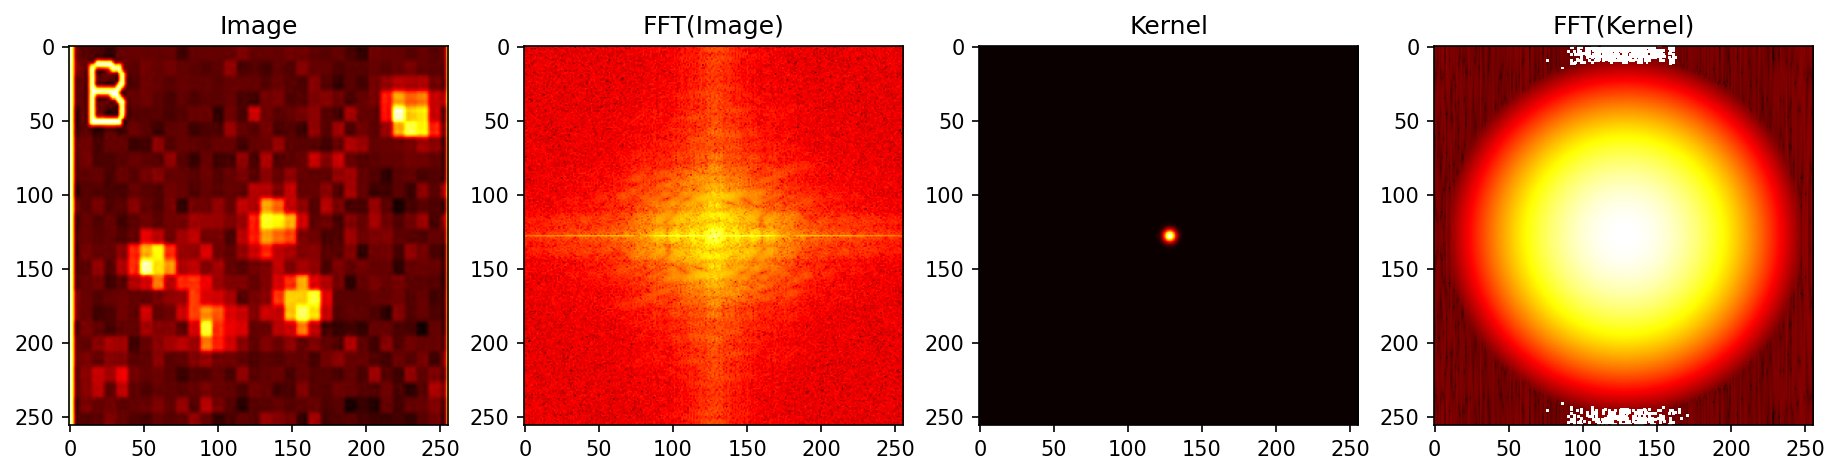

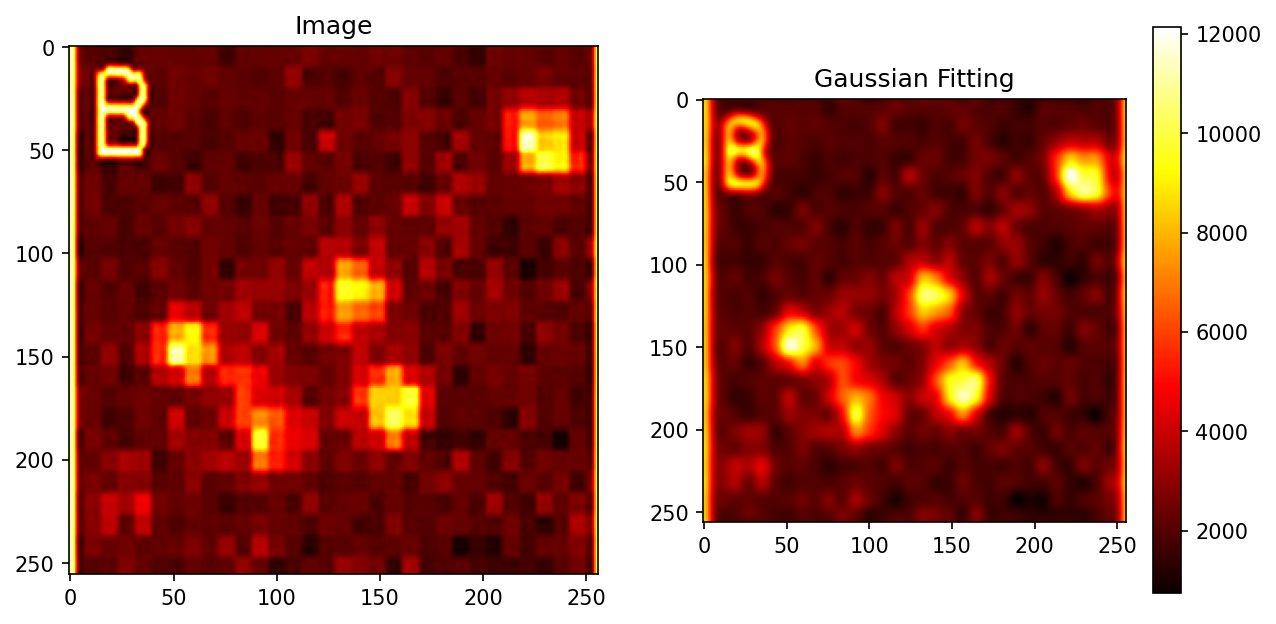

In [9]:
cmap = 'hot'

kernel = Gauss(3)

plt.figure(dpi = 150, figsize = (15,5))
plt.subplot(141)
plt.title("Image")
plt.imshow(gray_image, cmap = cmap)
plt.subplot(143)
plt.title("Kernel")
plt.imshow(kernel, cmap = cmap)
plt.subplot(142)
plt.title("FFT(Image)")

fft_img = fftshift((fft2(gray_image)))
fft_kernel = fftshift((fft2(kernel)))

plt.imshow(np.log(abs(fft_img)), cmap = cmap)
plt.subplot(144)
plt.title("FFT(Kernel)")
plt.imshow(np.log(abs(fft_kernel)), cmap = cmap)

plt.figure(dpi = 150, figsize = (10,5))
correlation = fft_img*np.conj(fft_kernel)
superresolved = abs(fftshift((ifft2(correlation))))

plt.subplot(121)
plt.title("Image")
plt.imshow(gray_image, cmap = cmap)
plt.subplot(122)
plt.title("Gaussian Fitting")
plt.imshow(superresolved, cmap = cmap)
plt.colorbar()

# plt.subplot(133)
# plt.title("Deconvolved Image via FFT")
# plt.imshow(f_xy, cmap = cmap)

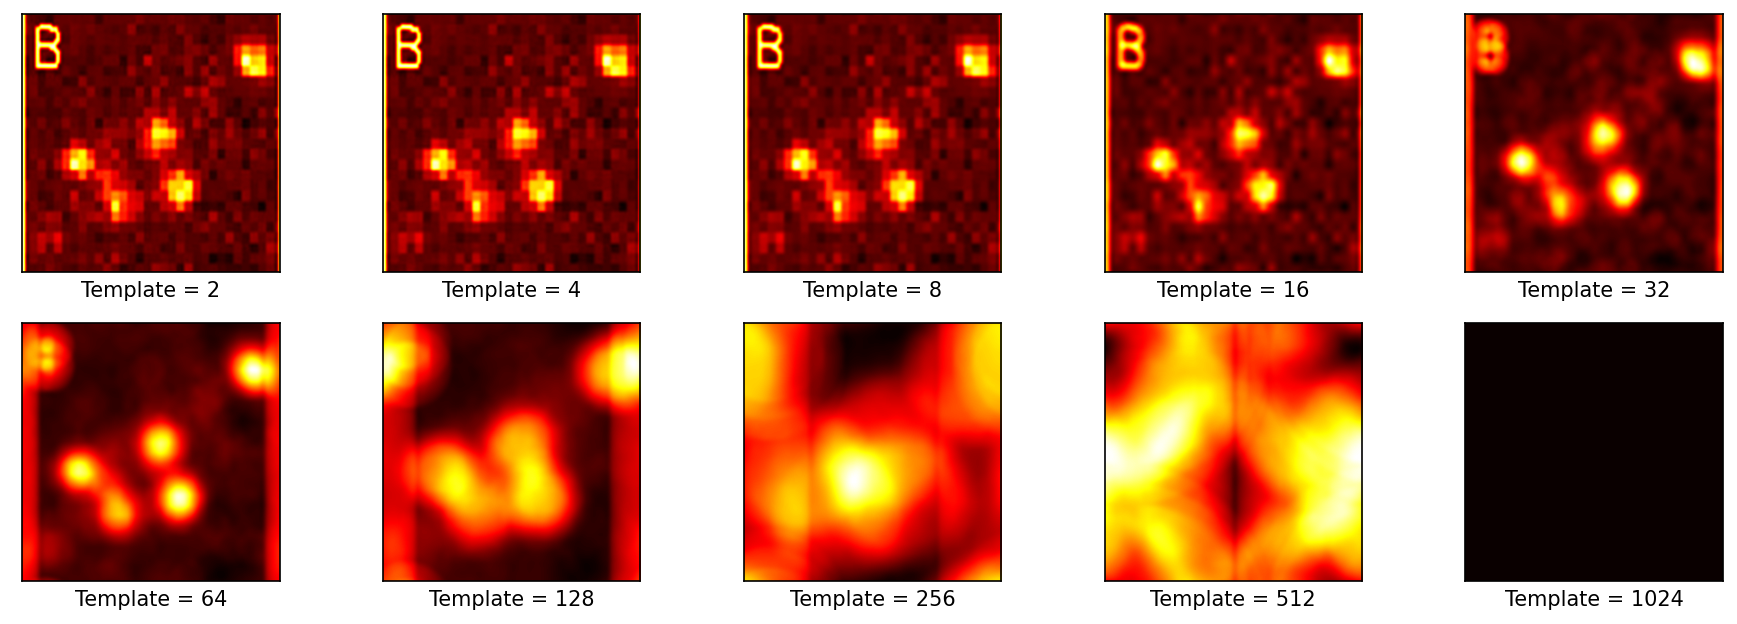

In [10]:
plt.figure(dpi = 150, figsize = (15,5))

for i in range(10):
    
    kernel = defocus_kernel(2**(i), sz=size)

    fft_img = fftshift((fft2(gray_image)))
    fft_kernel = fftshift((fft2(kernel)))

    correlation = fft_img*np.conj(fft_kernel)
    superresolved = abs(fftshift((ifft2(correlation))))
        
    plt.subplot(2,5,i+1)
    plt.imshow(superresolved, cmap = cmap)
    plt.xlabel("Template = " + str(2**(i+1)))
    plt.xticks([])
    plt.yticks([])

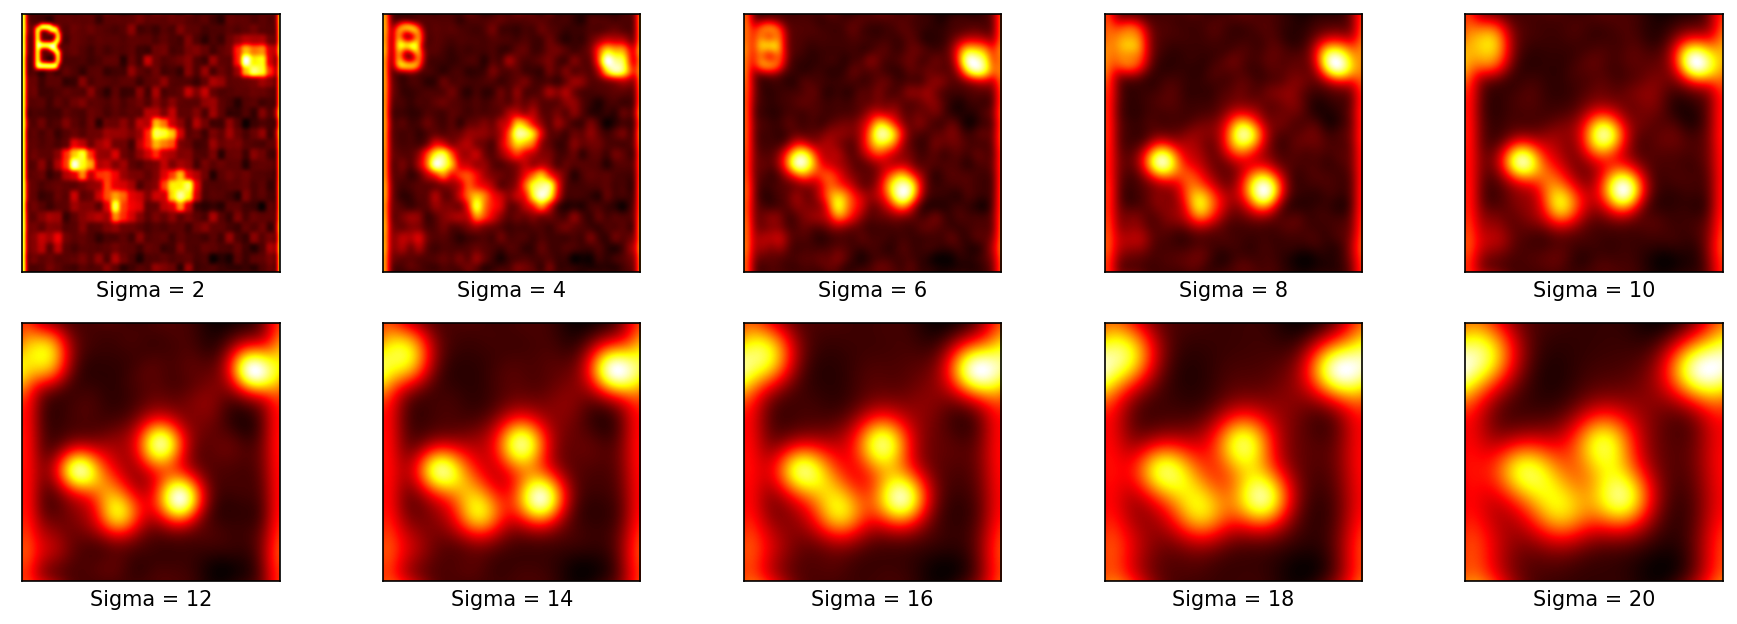

In [90]:
plt.figure(dpi = 150, figsize = (15,5))

for i in range(1,11):
    
    kernel = Gauss(2*i)

    fft_img = fftshift((fft2(gray_image)))
    fft_kernel = fftshift((fft2(kernel)))

    correlation = fft_img*np.conj(fft_kernel)
    superresolved = abs(fftshift((ifft2(correlation))))
        
    plt.subplot(2,5,i)
    plt.imshow(superresolved, cmap = cmap)
    plt.xlabel("Sigma = " + str(2*i))
    plt.xticks([])
    plt.yticks([])

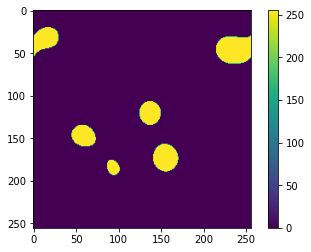

In [245]:
kernel = Gauss(12)

fft_img = fftshift((fft2(gray_image)))
fft_kernel = fftshift((fft2(kernel)))

correlation = fft_img*np.conj(fft_kernel)
image = abs(fftshift((ifft2(correlation))))
# image = io.imread("Picture1.png", as_gray=True)

img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

ret, thresh = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.colorbar()

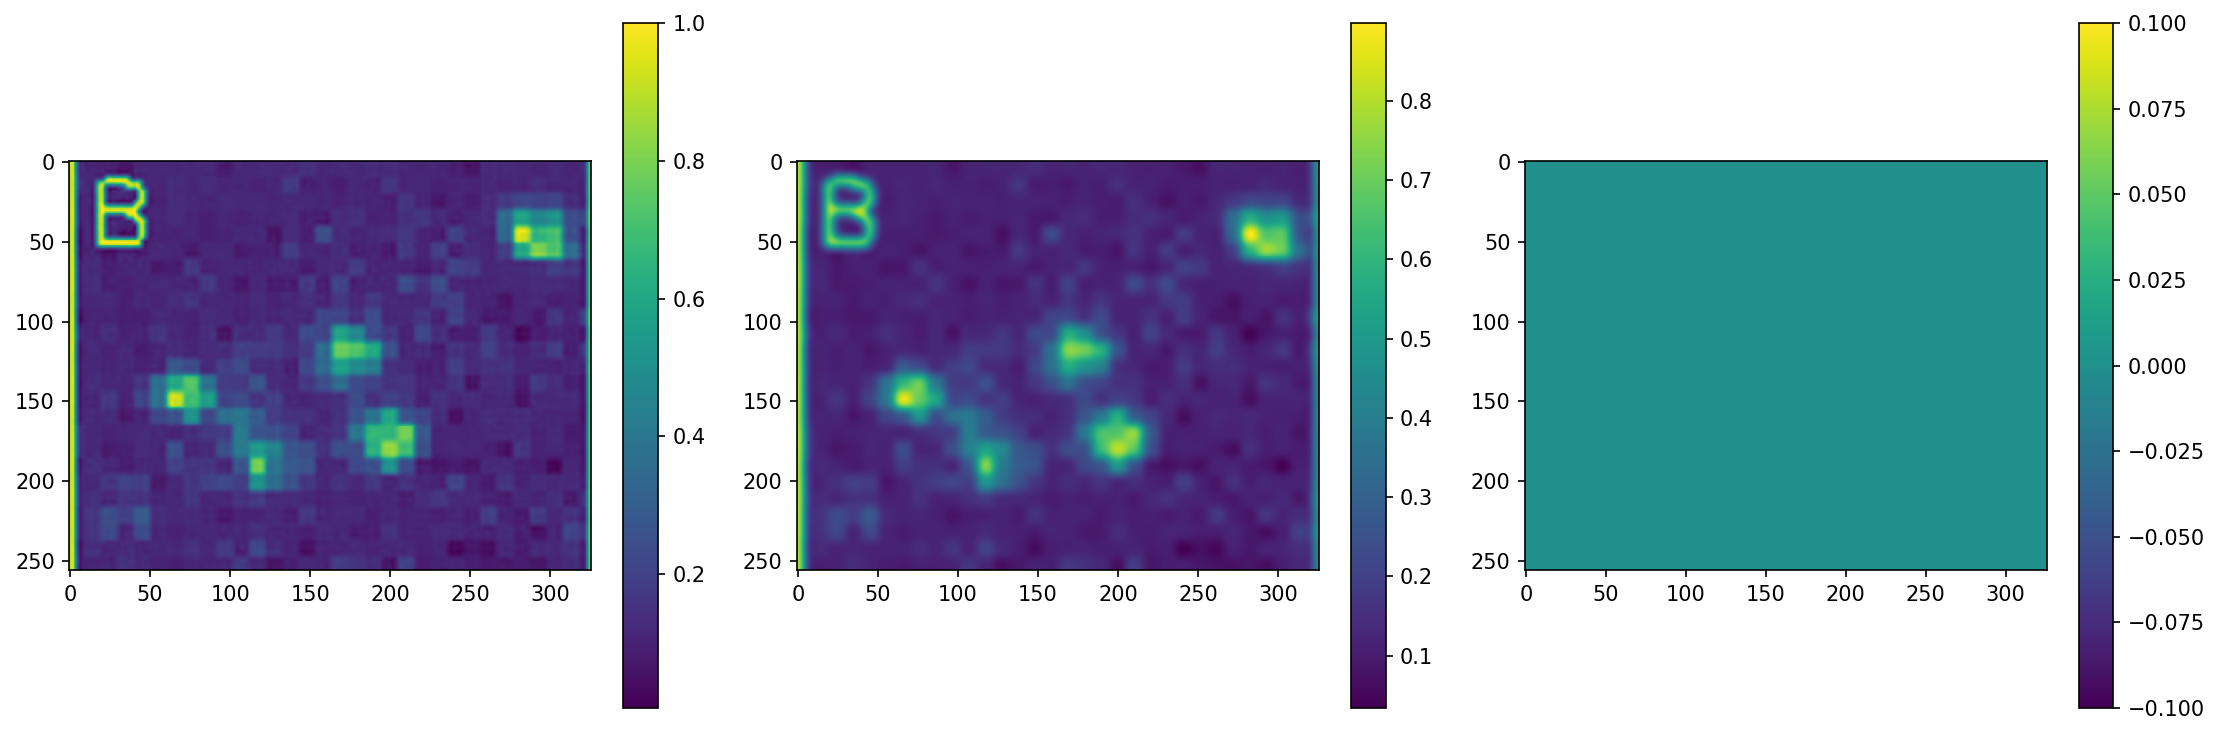

In [181]:
import cv2

# img = Gauss(100)
img = io.imread("Picture1.png", as_gray=True)

mask = np.zeros_like(img)
h, w = img.shape[:2]
cx, cy = w//2, h//2
cv2.circle(mask, (cx, cy), 200, 255, -1)

# Apply a Gaussian blur to the identified spots
blur_kernel = (15, 15)  # kernel size for the Gaussian blur
blur = cv2.GaussianBlur(img, blur_kernel, 0)


# blur = blur.astype(np.uint8) 
# mask = mask.astype(np.uint8)
blur_masked = cv2.bitwise_and(blur.astype(np.uint8) , blur.astype(np.uint8) , mask=mask.astype(np.uint8) )

plt.figure(dpi = 150, figsize = (15,5))
plt.subplot(131)
plt.imshow(img)
plt.colorbar()
plt.subplot(132)
plt.imshow(blur)
plt.colorbar()
plt.subplot(133)
plt.imshow(blur_masked)
plt.colorbar()
plt.tight_layout()


# plt.subplot(121)
# plt.imshow(mask)
# plt.colorbar()
# plt.subplot(122)
# plt.imshow(blur)
# plt.colorbar()


# # Subtract the blurred image from the original image to obtain a high-pass filtered image
# high_pass = cv2.subtract(img, blur_masked)

# # Add the high-pass filtered image back to the original image with a weighted factor
# sharpened = cv2.addWeighted(img, 1.5, high_pass, -0.5, 0)

# Save the output image
# cv2.imwrite('sharpened_image.png', sharpened)

0

In [170]:
blur.dtype, img.dtype, mask.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [163]:
?cv2.bitwise_and

Center of spot 1: (127.50231604764363, 1.2963222382566215)
Center of spot 2: (125.81214505070234, 254.55267029440486)
Center of spot 3: (32.538558100635136, 24.564337929468746)
Center of spot 4: (46.56223627656645, 229.11819054588668)
Center of spot 5: (120.46437398454322, 137.1236998012045)
Center of spot 6: (146.0922054475364, 56.50872299201937)
Center of spot 7: (173.51993561289382, 155.84117529385767)
Center of spot 8: (182.51799062543563, 91.18522510378183)


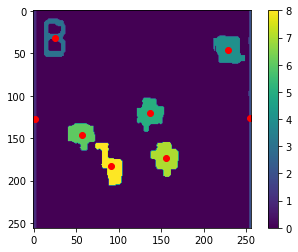

In [228]:
kernel = Gauss(1)

fft_img = fftshift((fft2(gray_image)))
fft_kernel = fftshift((fft2(kernel)))

correlation = fft_img*np.conj(fft_kernel)
image = abs(fftshift((ifft2(correlation))))

image_8bit = cv2.normalize(image, None, 215, 255, cv2.NORM_MINMAX, cv2.CV_8U)
threshold_value, binary_image = cv2.threshold(image_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
labeled_image, num_labels = ndimage.label(binary_image)

c_x, c_y = [], []
for label in range(1, num_labels+1):
    # create a mask for the current spot
    mask = np.zeros_like(binary_image)
    mask[labeled_image == label] = 1
    
    # calculate the center of mass for the current spot
    center = ndimage.measurements.center_of_mass(image * mask)
    
    # add the center of mass to the list of centers
    c_y.append(center[0])
    c_x.append(center[1])

    
    # optionally, you can also print the center of mass for each spot
    print(f"Center of spot {label}: {center}")

plt.imshow(labeled_image)
for i in range(len(c_x)): plt.plot(c_x[i], c_y[i], 'ro')
plt.colorbar()

In [204]:
for c in centers: print(c)


(127.50231604764363, 1.2963222382566215)
(125.81214505070234, 254.55267029440486)
(32.538558100635136, 24.564337929468746)
(46.56001141544206, 229.07336337493464)
(120.46437398454322, 137.1236998012045)
(146.10115400644654, 56.50374760300088)
(182.46665629574608, 91.1740407975535)
(173.51018581898904, 155.8333572666254)


In [205]:
centers

[(127.50231604764363, 1.2963222382566215),
 (125.81214505070234, 254.55267029440486),
 (32.538558100635136, 24.564337929468746),
 (46.56001141544206, 229.07336337493464),
 (120.46437398454322, 137.1236998012045),
 (146.10115400644654, 56.50374760300088),
 (182.46665629574608, 91.1740407975535),
 (173.51018581898904, 155.8333572666254)]

In [185]:
from scipy import ndimage
center = ndimage.measurements.center_of_mass(superresolved)
center

(126.22446167684461, 124.63880137406107)

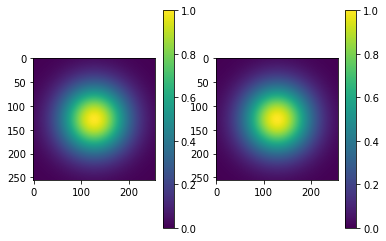

In [127]:
# data = superresolved
data = Gauss(50)
mu = 0.5
sigma = 10
k = 2

lower_bound = mu - k * sigma  # k is a scaling factor, e.g. 1, 2, or 3
upper_bound = mu + k * sigma

localized_data = data[(data >= lower_bound) & (data <= upper_bound)]
xx = localized_data.reshape(data.shape)
plt.subplot(121)
plt.imshow(data)
plt.colorbar()
plt.subplot(122)
plt.imshow(xx)
plt.colorbar()

In [51]:
from sklearn.mixture import GaussianMixture
from skimage import io


In [82]:
image = io.imread("Picture1.png", as_gray=True)
pixels = image.ravel()

100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  5.09it/s]


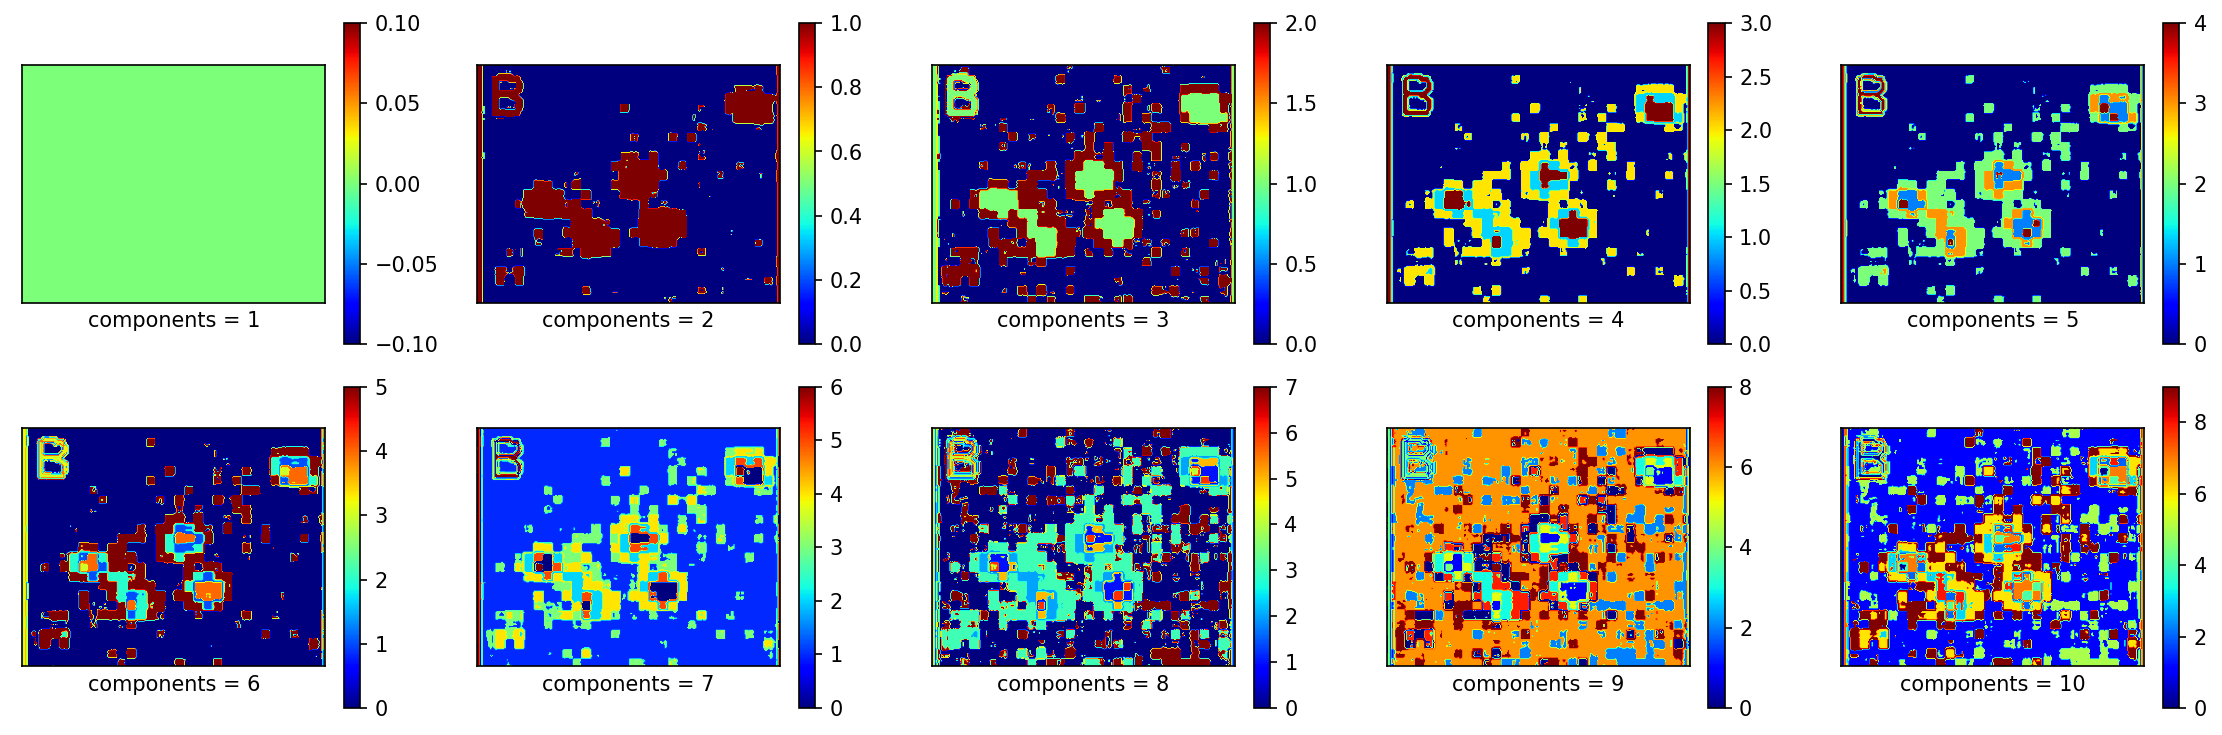

In [87]:
plt.figure(dpi = 150, figsize = (15,5))

for i in tqdm(range(1,11)):
    n_components = i
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(pixels.reshape(-1, 1))
    labels = gmm.predict(pixels.reshape(-1, 1))
    segmented_image = labels.reshape(image.shape)

    plt.subplot(2,5,i)
    plt.imshow(segmented_image, cmap = 'jet')
    plt.xlabel("components = " + str(i))
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
plt.tight_layout()
plt.show()

In [61]:
gmm.fit(pixels.reshape(-1, 1))
labels = gmm.predict(pixels.reshape(-1, 1))
segmented_image = labels.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

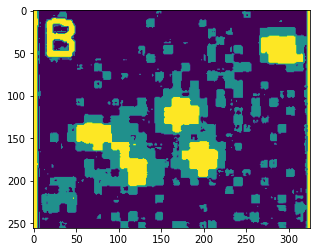

In [12]:
from scipy.stats import multivariate_normal
from scipy.ndimage import gaussian_filter
from skimage import io

TypeError: Invalid shape () for image data

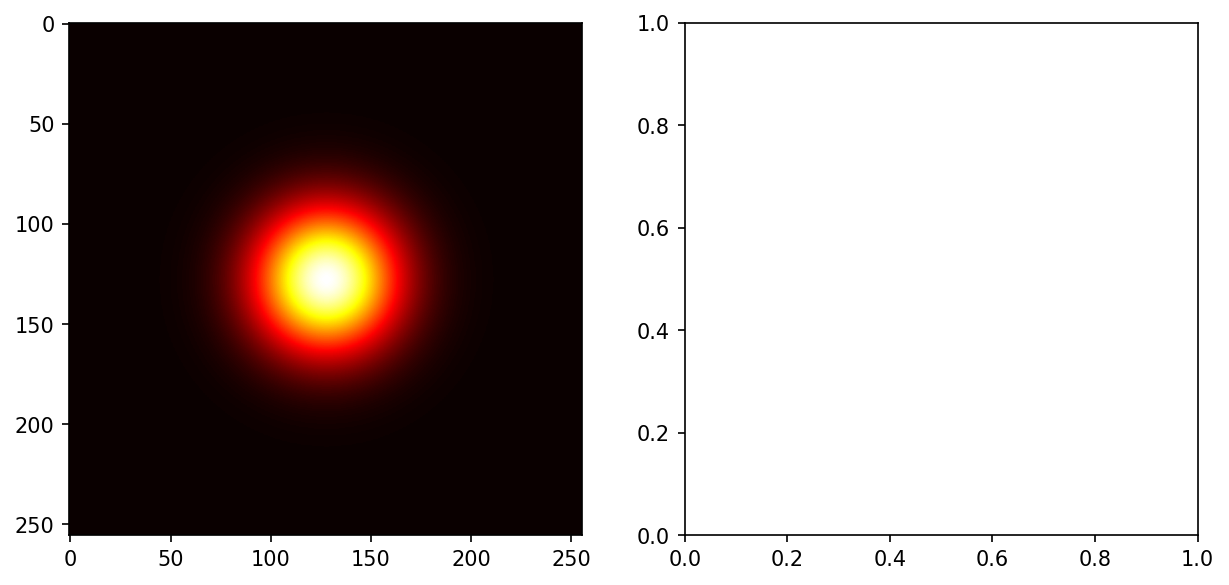

In [43]:
gray_image = Gauss(sigma = 25)
image = gaussian_filter(gray_image, sigma=25)
pixels = image.ravel()
mean = np.mean(pixels)
variance = np.var(pixels)
mvn = multivariate_normal(mean=mean, cov=variance)
new_pixels = mvn.rvs(size=pixels.shape[0])
new_image = new_pixels.reshape(image.shape)

plt.figure(dpi = 150, figsize = (15,5))
plt.subplot(131)
plt.imshow(gray_image, cmap = cmap)
plt.subplot(132)
plt.imshow(variance, cmap = cmap)
plt.subplot(133)
plt.imshow(new_image, cmap = cmap)

In [46]:
mvn

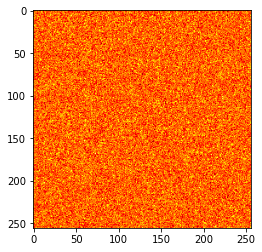

LinAlgError: singular matrix

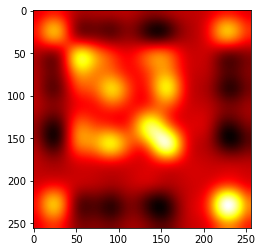

In [31]:
pixels = image.reshape(-1, image.shape[-1])
mean = np.mean(pixels, axis=0)
covariance = np.cov(pixels, rowvar=False)
plt.imshow(covariance, cmap = cmap)
mvn = multivariate_normal(mean=mean, cov=covariance)

In [ ]:
Gaussian = np.zeros([N,N], float)
f = lambda x,y: np.exp(-(x*x+y*y)/(2*sigma*sigma))
for i in range(L//2):
	for j in range(L//2):
		Gaussian[i,j]=f(i,j)
		Gaussian[-i,-j]=f(i,j)
		Gaussian[-i,j]=f(i,j)
		Gaussian[i,-j]=f(i,j)
        

In [ ]:
plt.figure(dpi = 150, figsize = (15,5))

for i in range(8):
    
    kernel = defocus_kernel(2**(i), sz=size)

    fft_img = fftshift((fft2(gray_image)))
    fft_kernel = fftshift((fft2(kernel)))

    correlation = fft_img*np.conj(fft_kernel)
    superresolved = abs(fftshift((ifft2(correlation))))
        
    plt.subplot(2,4,i+1)
    plt.imshow(superresolved, cmap = cmap)
    plt.xlabel("Template = " + str(2**(i+1)))
    plt.xticks([])
    plt.yticks([])

In [18]:
# class GMM(object):
#     def __init__(self, X, k=2):
#         # dimension
#         X = np.asarray(X)
#         self.m, self.n = X.shape
#         self.data = X.copy()
#         # number of mixtures
#         self.k = k
        
#     def _init(self):
#         # init mixture means/sigmas
#         self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
#         self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
#         self.phi = np.ones(self.k)/self.k
#         self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
#         #print(self.mean_arr)
#         #print(self.sigma_arr)
    
#     def fit(self, tol=1e-4):
#         self._init()
#         num_iters = 0
#         ll = 1
#         previous_ll = 0
#         while(ll-previous_ll > tol):
#             previous_ll = self.loglikelihood()
#             self._fit()
#             num_iters += 1
#             ll = self.loglikelihood()
#             print('Iteration %d: log-likelihood is %.6f'%(num_iters, ll))
#         print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, ll))
    
#     def loglikelihood(self):
#         ll = 0
#         for i in range(self.m):
#             tmp = 0
#             for j in range(self.k):
#                 #print(self.sigma_arr[j])
#                 tmp += sp.stats.multivariate_normal.pdf(self.data[i, :], 
#                                                         self.mean_arr[j, :].A1, 
#                                                         self.sigma_arr[j, :]) *\
#                        self.phi[j]
#             ll += np.log(tmp) 
#         return ll
    
#     def _fit(self):
#         self.e_step()
#         self.m_step()
        
#     def e_step(self):
#         # calculate w_j^{(i)}
#         for i in range(self.m):
#             den = 0
#             for j in range(self.k):
#                 num = sp.stats.multivariate_normal.pdf(self.data[i, :], 
#                                                        self.mean_arr[j].A1, 
#                                                        self.sigma_arr[j]) *\
#                       self.phi[j]
#                 den += num
#                 self.w[i, j] = num
#             self.w[i, :] /= den
#             assert self.w[i, :].sum() - 1 < 1e-4
            
#     def m_step(self):
#         for j in range(self.k):
#             const = self.w[:, j].sum()
#             self.phi[j] = 1/self.m * const
#             _mu_j = np.zeros(self.n)
#             _sigma_j = np.zeros((self.n, self.n))
#             for i in range(self.m):
#                 _mu_j += (self.data[i, :] * self.w[i, j])
#                 _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
#                 #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
#             self.mean_arr[j] = _mu_j / const
#             self.sigma_arr[j] = _sigma_j / const

In [4]:
# def multivariate_gaussian(pos, mu, Sigma):
#     """Return the multivariate Gaussian distribution on array pos."""

#     n = mu.shape[0]
#     Sigma_det = np.linalg.det(Sigma)
#     Sigma_inv = np.linalg.inv(Sigma)
#     N = np.sqrt((2*np.pi)**n * Sigma_det)
#     # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
#     # way across all the input variables.
#     fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

#     return np.exp(-fac / 2) / N

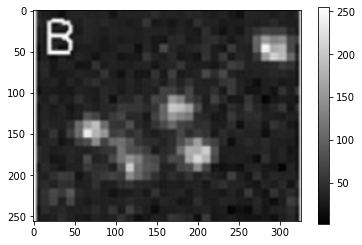

In [5]:
img = Image.open("Picture1.png")
gray_image=img.convert('L')
plt.imshow(gray_image, cmap = "gray")
plt.colorbar()

In [6]:
def blur_edge(img, d=31):
    h, w  = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    y, x = np.indices((h, w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img*w + img_blur*(1-w)

In [20]:
kernel = defocus_kernel(25, sz=100)

In [26]:
g_xy = np.array(gray_image)

In [39]:
g_xy.shape[1]

326

In [54]:
h_xy = np.pad(kernel, [(g_xy.shape[0]//2-kernel.shape[0], kernel.shape[0]),
                       (g_xy.shape[1]//2, kernel.shape[1])], 'constant')

NameError: name 'f_xy' is not defined

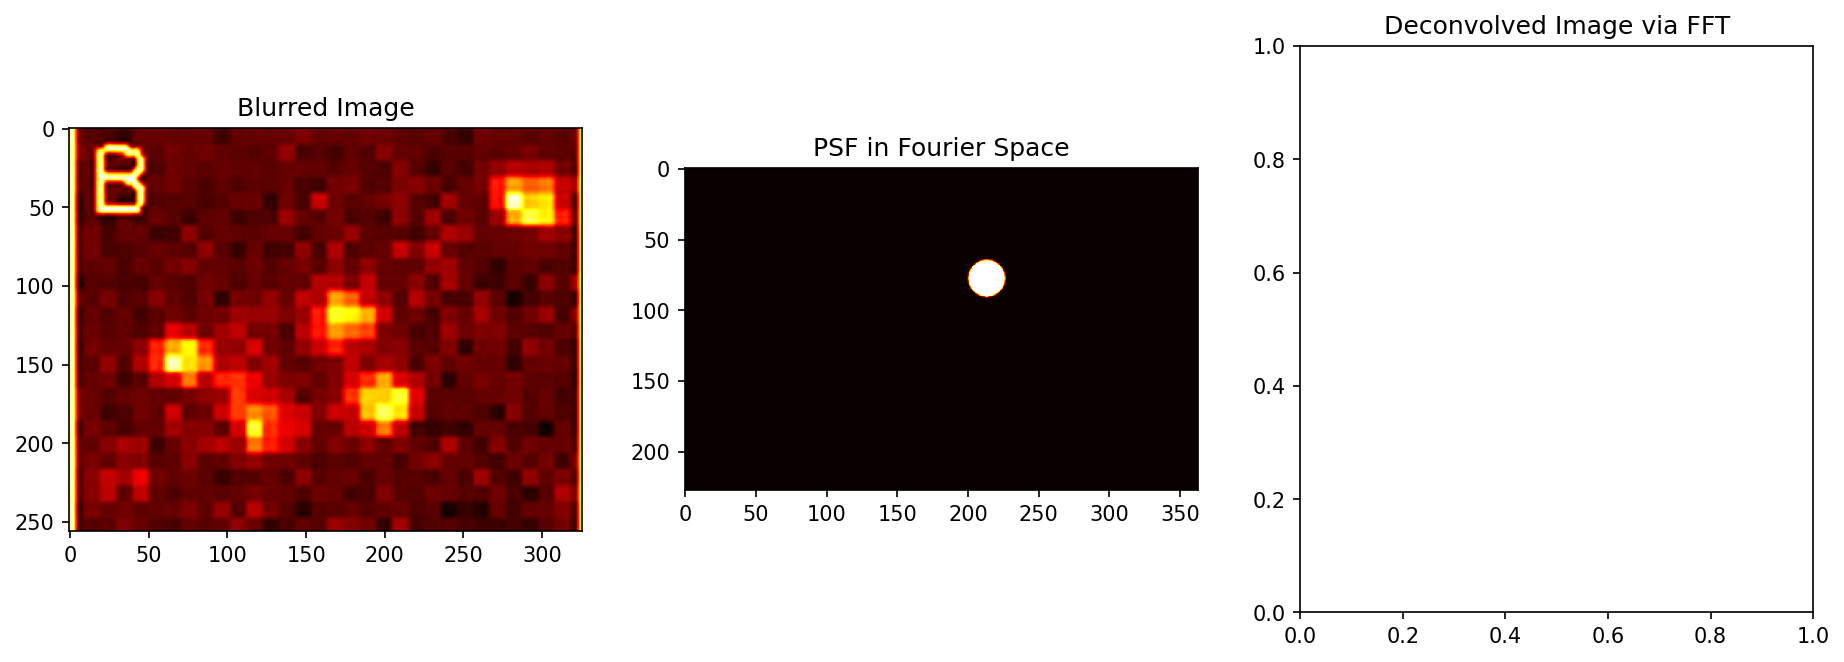

In [20]:
gmm = GMM(gray_image)
gmm.fit()

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/2037328255.py:42: RuntimeWarning: divide by zero encountered in log
  ll += np.log(tmp)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/2037328255.py:60: RuntimeWarning: invalid value encountered in true_divide
  self.w[i, :] /= den


AssertionError: 

In [14]:
for i in range(326):

(256, 326, 4)

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/1334679046.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(gray_image, bins = 300, normed = True)


Text(0.5, 0, 'a*')

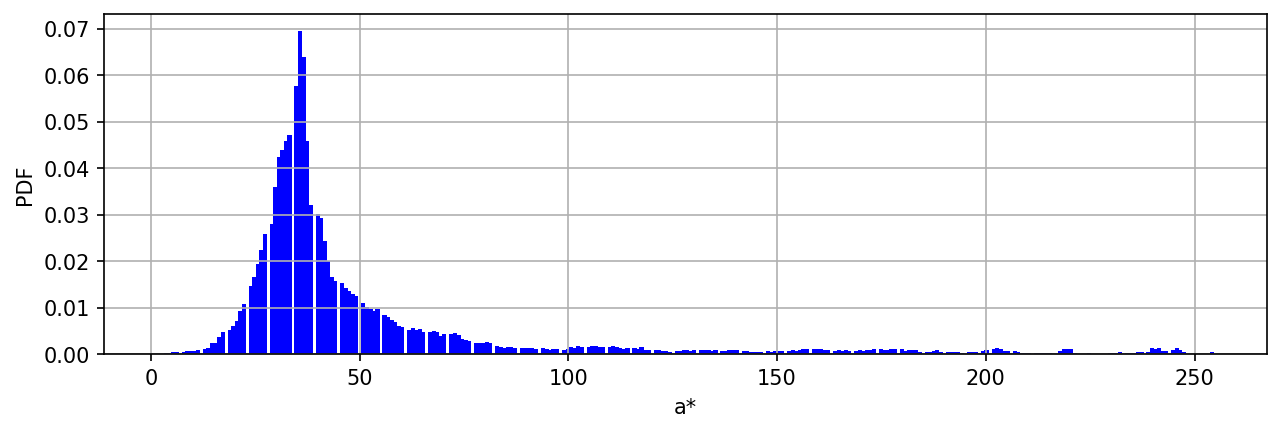

In [12]:
plt.figure(figsize = [10,3], dpi = 150)
plt.grid()
hist, bins = np.histogram(gray_image, bins = 300, normed = True)
plt.bar(bins[:-1], hist, width=1, color='b')
plt.ylabel("PDF")
plt.xlabel("a*")
plt.colorbar
# plt.xlim(-8,8)